# CARNEGIE MELLON UNIVERSITY
**Name**: Junxiao Guo <br/>
**Andrew ID**: junxiaog
**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)<br/>
**ASSIGNMENT 2** <br/>

# Question 1
Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Malnutrition prevalence, weight for age (% of children under 5).”

What kind of relationship do you expect? Make a scatter plot of malnutrition against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a graph for developing regions (six types and use one color for each). Make a graph for income levels (four types and one color for each). Carefully label all graphs and provide legends.# Q1_1

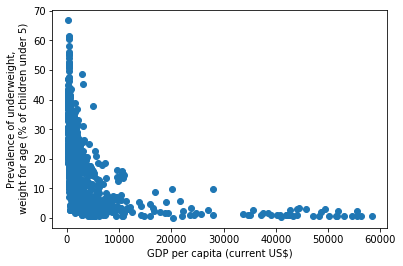

In [104]:
import matplotlib.pyplot as plt
f =open('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284.csv','r')
gdp_pcap_info = f.readlines()
title = gdp_pcap_info[4] # Title of the table
gdp_data = gdp_pcap_info[5:] # Rest of the data
extracted_gdp_data = []
countries_code = []
for i in gdp_data:
    tmp = i.split(',')
    tmpidx = tmp.index('"NY.GDP.PCAP.CD"')+1
    countries_code.append(tmp[0])
    extracted_gdp_data.append(tmp[tmpidx:-1])

# print(len(countries_code))
f.close()

f2 = open('API_SH.STA.MALN.ZS_DS2_en_csv_v2_49604/API_SH.STA.MALN.ZS_DS2_en_csv_v2_49604.csv','r')
maln_info = f2.readlines()
title_2 = maln_info[4]
maln_data = maln_info[5:]
extracted_maln_data = []
countries_code_2 = []
for j in maln_data:
    tmp = j.split(',')
    tmpidx = tmp.index('"SH.STA.MALN.ZS"')+1
    countries_code_2.append(tmp[0])
    extracted_maln_data.append(tmp[tmpidx:-1])

assert countries_code_2 == countries_code, "countries code doesn't match!"
assert title_2==title,"Title doesn't match!"
assert len(extracted_maln_data) == len(extracted_gdp_data), "Number of countries doesn't match!"

all_info = []
for i,j in zip(extracted_gdp_data,extracted_maln_data):
    assert len(i) == len(j),"Different length of array found!"
    for n in range(len(i)):
        if (i[n]!='""' and j[n]!='""'):
            all_info.append((float(i[n].strip('"')),float(j[n].strip('"'))))

plt.scatter([i[0] for i in all_info],[i[1] for i in all_info])
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()
